# Projeto 3
## Bruno Dratcu e Cauê Citrini Lacava
___

## Investimentos do setor privado em saúde e melhora das condições sanitárias são fatores relevantes no índice de mortalidade infantil?

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/CaueCitrini/Documents/Graduação Insper/Segundo Semetre 2016:2/Ciência dos Dados/CD/Projeto 3


In [3]:
dados1 = pd.read_excel('indicator gapminder under5mortality.xlsx',index_col=0)
dados2 = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx',index_col=0)
dados3 = pd.read_excel('indicator private share of total health spending.xls.xlsx',index_col=0)
dados4 = pd.read_excel('Indicator_Improved sanitation total percent.xlsx',index_col=0)
dados5 = pd.read_excel('indicatorpolityiv.xlsx',index_col=0)

In [4]:
dados = pd.DataFrame()
dados["Mortalidade_Infantil"] = dados1[2010]
dados["PIB_per_capita"] = dados2[2010]
dados["Índice_de_Democracia"] = dados5[2010]
dados["Melhora_de_condições_sanitárias"] = dados4["2010"]
dados["Participação_privada_nos_gastos_de_saúde"] = dados3[2010]

In [5]:
#Retirar NaN
dados=dados[~np.isnan(dados.Mortalidade_Infantil)]
dados=dados[~np.isnan(dados.Índice_de_Democracia)]
dados=dados[~np.isnan(dados.Melhora_de_condições_sanitárias)]
dados=dados[~np.isnan(dados.Participação_privada_nos_gastos_de_saúde)]
dados.shape

(132, 5)

## Análise Descritiva

#### Diante da análise descritiva iremos analizar a possivel relação entre o índice de mortalidade infantil e as variáveis explicativas. Podemos observar a partir dos gráficos de dispersão a baixo que Índice de Democracia, Melhora das condições sanitárias, Participação privada nos gastos em saúde e PIB per capita apresentam uma disposição dos pontos próxima de linear que pode ser comprovado pelos fortes índices de correlação com mortalidade infantil.

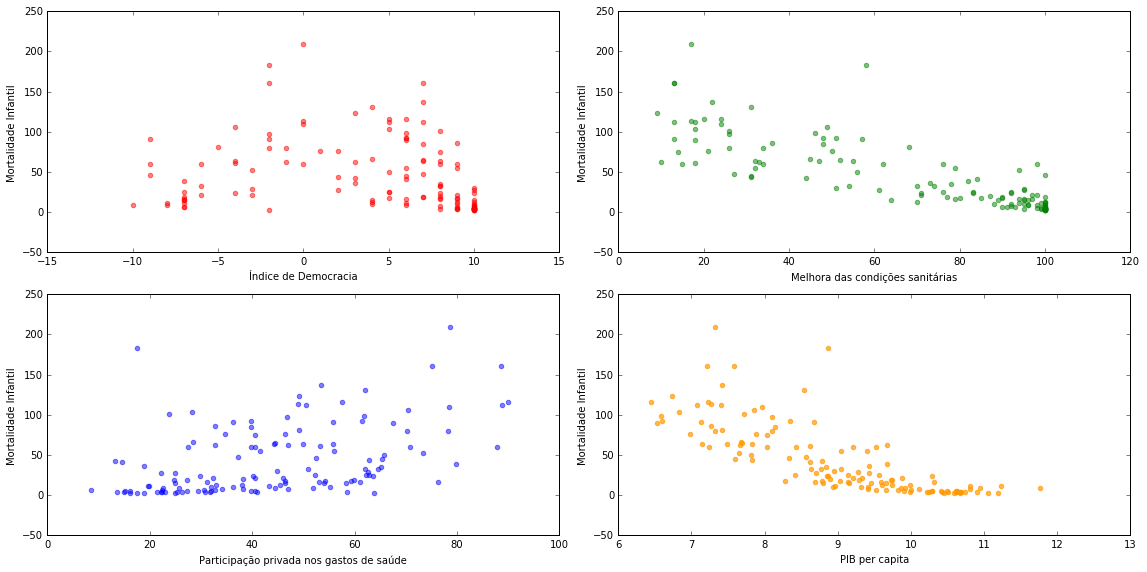

In [6]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(dados.Índice_de_Democracia, dados.Mortalidade_Infantil, alpha=0.5, color="red")  # Plot the raw data
ax[0,0].set_xlabel("Índice de Democracia")
ax[0,0].set_ylabel("Mortalidade Infantil")

ax[0,1].scatter(dados.Melhora_de_condições_sanitárias, dados.Mortalidade_Infantil, alpha=0.5, color="green")  # Plot the raw data
ax[0,1].set_xlabel("Melhora das condições sanitárias")
ax[0,1].set_ylabel("Mortalidade Infantil")

ax[1,0].scatter(dados.Participação_privada_nos_gastos_de_saúde, dados.Mortalidade_Infantil, alpha=0.5, color="blue")  # Plot the raw data
ax[1,0].set_xlabel("Participação privada nos gastos de saúde")
ax[1,0].set_ylabel("Mortalidade Infantil")

ax[1,1].scatter(np.log(dados.PIB_per_capita), dados.Mortalidade_Infantil, alpha=0.7, color="#ff9900")  # Plot the raw data
ax[1,1].set_xlabel("PIB per capita")
ax[1,1].set_ylabel("Mortalidade Infantil")

plt.tight_layout(1)

In [7]:
dados.corr(method='pearson')

,Mortalidade_Infantil,PIB_per_capita,Índice_de_Democracia,Melhora_de_condições_sanitárias,Participação_privada_nos_gastos_de_saúde
Mortalidade_Infantil,1.000000,-0.548076,-0.219780,-0.828963,0.454298
PIB_per_capita,-0.548076,1.000000,0.041990,0.598436,-0.457910
Índice_de_Democracia,-0.219780,0.041990,1.000000,0.108888,-0.174994
Melhora_de_condições_sanitárias,-0.828963,0.598436,0.108888,1.000000,-0.422514
Participação_privada_nos_gastos_de_saúde,0.454298,-0.457910,-0.174994,-0.422514,1.000000


## Análise Gráfica

#### O gráfico abaixo apresenta a representação gráfica do plano de regressão da variável Mortalidade Infantil em função da Melhora das condições sanitárias e participação privada nos gastos em saúde.

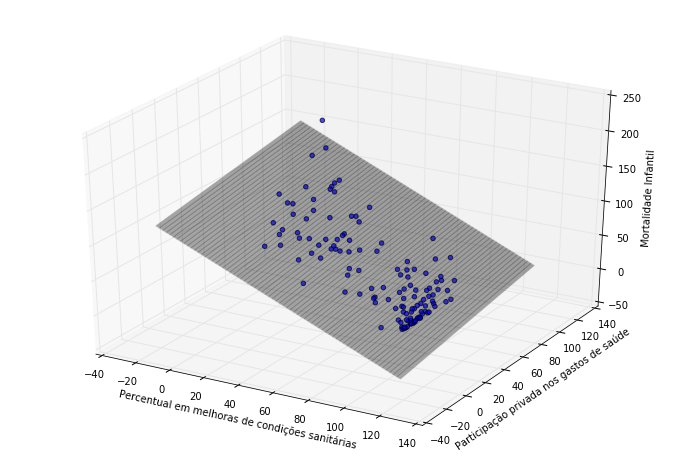

In [8]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='Mortalidade_Infantil ~ Melhora_de_condições_sanitárias + Participação_privada_nos_gastos_de_saúde', data = dados)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(-20, 120, 2)                # generate a mesh
y_surf = np.arange(-20, 120, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Melhora_de_condições_sanitárias': x_surf.ravel(), 'Participação_privada_nos_gastos_de_saúde': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['Melhora_de_condições_sanitárias'], dados['Participação_privada_nos_gastos_de_saúde'], dados['Mortalidade_Infantil'],
           c='blue',
           marker='o',
           alpha=0.7)

#ax.set_xlim(0,100)
#ax.set_ylim(0,10)
ax.set_xlabel('Percentual em melhoras de condições sanitárias')
ax.set_ylabel('Participação privada nos gastos de saúde')
ax.set_zlabel('Mortalidade Infantil')

## Análise de Regressão

<img src="Equação da Reta.png", width=800, height=500, align="center">

A equação acima representa o modelo de regressão criado. O coeficiente acima de valor 172.1052 representa o intercepto do gráfico caso todos os valores de Indice de Democracia, Condições Sanitátrias, Participação Privada em Saúde e PIB per capita forem todos iguais a zero, ja os coeficientes associados as variáveis explicativas indicam a que passo cada uma das variáveis explicativas interferem na variável resposta. Como por exemplo a cada mudança de uma unidade no índice de democracia levara a alteração de 0,7545 no índice de mortalidade infantil, de forma que se o valor dessa constante for negativo esta variável é inversamente proporcional a resposta e caso fosse positivo teriam uma relação direta de proporcionalidade. E o fator Ei representa o erro associado a cada um dos pontos que não foi possível de ser previsto.

Da tabela abaixo podemos primeiramente observar o coeficiente de determinação R-squared de valor 0,729 que representa que em 72,9% dos casos o modelo pode explicar os dados observados, o coeficiente Adj. R-squared também represeta quão bem o modelo descreve os dados porém apresenta um valor menor por levar em conta o número de variáveis do modelo e o número de observações apresentado na tabela por No. Observations.

Realizamos a inferencia no modelo de regressão por meio do teste F para averiguar a hipotese nula de que todos os coeficientes que modelam a variável resposta são iguais a zero e a alternativa é que estes coeficientes sejam diferente de zero, mas a hipotese foi rejeitada ja que o valor da probabilidade do teste F foi extremamente pequeno. Por meio de testes T foi medido a relevância e a qualidade dos coeficientes individualmente no modelo proposto.

A última tabela apresenta os valores dos testes Omnibus e Jarque-Bera que verificam se os resíduos dos modelos tem distribuição normal de variância constante apresentando homocedasticidade.

In [40]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.Mortalidade_Infantil
X=dados.iloc[:,(2,3,4)]
X["log_pib"] = np.log(dados.PIB_per_capita)
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

/Users/CaueCitrini/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Mortalidade_Infantil   R-squared:                       0.729
Model:                              OLS   Adj. R-squared:                  0.721
Method:                   Least Squares   F-statistic:                     85.50
Date:                  Tue, 06 Dec 2016   Prob (F-statistic):           4.44e-35
Time:                          19:11:15   Log-Likelihood:                -597.98
No. Observations:                   132   AIC:                             1206.
Df Residuals:                       127   BIC:                             1220.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
const                                      172.1052     24.549      7.011      0.000       123.528   220.683
Índice_de_Democracia                        -0.7545      0.333     -2.264      0.025        -1.414    -0.095
Melhora_de_condições_sanitárias             -0.8299      0.112     -7.384      0.000        -1.052    -0.608
Participação_privada_nos_gastos_de_saúde     0.1276      0.125      1.022      0.309        -0.119     0.375
log_pib                                     -8.1642      3.017     -2.706      0.008       -14.135    -2.194
==============================================================================
Omnibus:                       79.767   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.607
Skew:                           1.986   Prob(JB):                    3.38e-124
Kurtosis:                      12.360   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusão



Pela análise dos recursos índice de correlação, análise de regressão e inferência do modelo de regressão podemos concluir que o modelo é eficiente para descrever os índices de mortalidade infantil em função do PIB per capita, Índice de Democracia, Condições Sanitárias e Participação Privada em Saúde. Porém podemos ver pelos coeficientes determinados que os fatores mais determinates são PIB per capita e Condições Sanitárias e não Participação Privada de gastos em Saúde que apresentou um coeficiente baixo e uma alta probabilidade (30% com nível de significância de 5%) deste coeficiente não ser relevante para modelagem da mortalidade infantil.

A regressão linear foi uma excelente ferramenta auxiliadora de uma possível tomada de decisão de interferência em relação as condições que causam maior mortalidade infantil por exemplo, apresentando numericamente de que forma os fatores se relacionam e até a veracidade desses valores numéricos por meio de testes de inferência.